In [4]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

In [32]:
iris = datasets.load_iris()
X = iris.data[:,(2,3)]  #petal length petal width
y = (iris.target == 2).astype(np.float64)  #Iris virginica

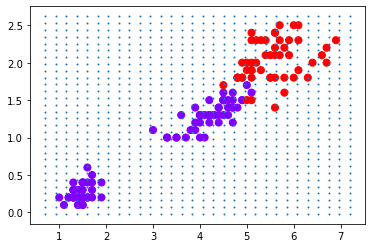

In [33]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子图
xlim = ax.get_xlim()
ylim = ax.get_ylim()
#在最大值和最小值之间形成30个规律的数据
axisx = np.linspace(xlim[0],xlim[1],30)
axisy = np.linspace(ylim[0],ylim[1],30)
 
axisy,axisx = np.meshgrid(axisy,axisx)
#我们将使用这里形成的二维数组作为我们contour函数中的X和Y
#使用meshgrid函数将两个一维向量转换为特征矩阵
#核心是将两个特征向量广播，以便获取y.shape * x.shape这么多个坐标点的横坐标和纵坐标
 
xy = np.vstack([axisx.ravel(), axisy.ravel()]).T
#其中ravel()是降维函数，vstack能够将多个结构一致的一维数组按行堆叠起来
#xy就是已经形成的网格，它是遍布在整个画布上的密集的点
plt.scatter(xy[:,0],xy[:,1],s=1,cmap="rainbow")

In [34]:
clf = SVC(kernel = "linear").fit(X,y)#计算出对应的决策边界
Z = clf.decision_function(xy).reshape(axisx.shape)
print(Z.shape)
#重要接口decision_function，返回每个输入的样本所对应的到决策边界的距离
#然后再将这个距离转换为axisx的结构，这是由于画图的函数contour要求Z的结构必须与X和Y保持一致

(30, 30)


In [35]:
axisx

array([[0.705     , 0.705     , 0.705     , 0.705     , 0.705     ,
        0.705     , 0.705     , 0.705     , 0.705     , 0.705     ,
        0.705     , 0.705     , 0.705     , 0.705     , 0.705     ,
        0.705     , 0.705     , 0.705     , 0.705     , 0.705     ,
        0.705     , 0.705     , 0.705     , 0.705     , 0.705     ,
        0.705     , 0.705     , 0.705     , 0.705     , 0.705     ],
       [0.9287931 , 0.9287931 , 0.9287931 , 0.9287931 , 0.9287931 ,
        0.9287931 , 0.9287931 , 0.9287931 , 0.9287931 , 0.9287931 ,
        0.9287931 , 0.9287931 , 0.9287931 , 0.9287931 , 0.9287931 ,
        0.9287931 , 0.9287931 , 0.9287931 , 0.9287931 , 0.9287931 ,
        0.9287931 , 0.9287931 , 0.9287931 , 0.9287931 , 0.9287931 ,
        0.9287931 , 0.9287931 , 0.9287931 , 0.9287931 , 0.9287931 ],
       [1.15258621, 1.15258621, 1.15258621, 1.15258621, 1.15258621,
        1.15258621, 1.15258621, 1.15258621, 1.15258621, 1.15258621,
        1.15258621, 1.15258621, 1.15258621, 1.

(-0.01999999999999999, 2.62)

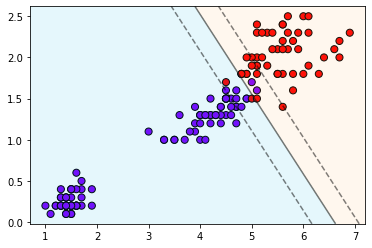

In [49]:
#首先要有散点图
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow",edgecolors='k')
ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子图
#画决策边界和平行于决策边界的超平面
ax.contourf(axisx,axisy,Z,levels = 0,alpha =0.1,cmap = 'rainbow') 
ax.contour(axisx,axisy,Z
           ,colors="k"
           ,levels=[-1,0,1] #画三条等高线，分别是Z为-1，Z为0和Z为1的三条线
           ,alpha=0.5#透明度
           ,linestyles=["--","-","--"])

ax.set_xlim(xlim)#设置x轴取值
ax.set_ylim(ylim)


In [19]:
clf.score(X,y)
#返回给定测试数据和标签的平均准确度

0.9666666666666667

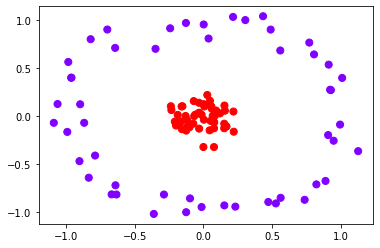

In [20]:
from sklearn.datasets import make_circles
X,y = make_circles(100, factor=0.1, noise=.1)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plt.show()


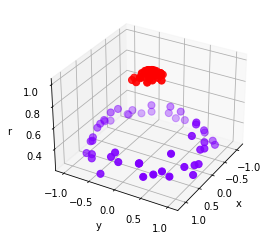

In [21]:
#定义一个由x计算出来的新维度r
r = np.exp(-(X**2).sum(1))
from mpl_toolkits import mplot3d
#定义一个绘制三维图像的函数
#elev表示上下旋转的角度
#azim表示平行旋转的角度
def plot_3D(elev=30,azim=30,X=X,y=y,r=r):
    ax = plt.subplot(projection="3d")  # 这一步需要导入mplot3d
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='rainbow')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")
    plt.show()
    
plot_3D()


In [22]:
from ipywidgets import interact,fixed
interact(plot_3D,elev=[0,30,60,90],azip=(-180,180),X=fixed(X),y=fixed(y))
plt.show()

interactive(children=(Dropdown(description='elev', index=1, options=(0, 30, 60, 90), value=30), IntSlider(valu…

NameError: name 'plot_svc_decision_function' is not defined

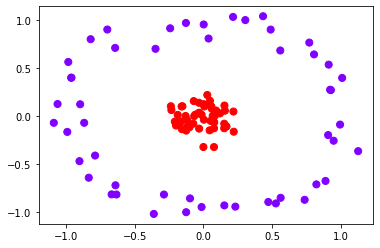

In [25]:
clf = SVC(kernel = "rbf").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)